In [5]:
#from my_functions import *
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from numpy import sin, cos, arccos, pi, round

import matplotlib.pyplot as plt

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'kilometers'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [7]:
main=pd.read_csv('lookalike main.csv',sep=';',decimal=',')
main

,BranchCode,BranchID,BranchName,StoreID,StoreCode,StoreName,DivisionName,type,sales_area,has_parking,...,branches_dns_in_city,other_branches_dns_in_1km,other_branches_dns_in_5km,competitors_in_1km,competitors_in_5km,MinCount,MaxCount,distance_to_rrc,CategoryCode,productcount
0,5917,6585,Кировский Гагарина КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.113636,1.0,...,0.25,0.0,0.000000,0.000000,0.162791,76.0,144.0,0.580275,AM18250,218
1,4999,5658,Шкотово КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.160985,1.0,...,0.25,0.0,0.000000,0.076923,0.046512,51.0,83.0,0.051188,AM18250,158
2,4239,4860,Находка ТК ДТС Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.994318,1.0,...,1.00,0.0,0.333333,0.692308,0.744186,378.0,649.0,0.223441,AM18250,1713
3,4042,4663,Врангель ТЦ Каскад КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.084754,1.0,...,1.00,0.0,0.000000,0.153846,0.093023,107.0,183.0,0.260113,AM18250,294
4,4147,4770,Чугуевка 50 Лет Октября КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.138731,0.0,...,0.25,0.0,0.000000,0.230769,0.139535,137.0,236.0,0.431167,AM18250,381
5,3952,4573,Черниговка ТЦ Салют ТП,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.009470,0.0,...,0.25,0.0,0.000000,0.153846,0.093023,70.0,124.0,0.300850,AM18250,209
6,3673,3951,Хороль ТЦ Елена КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.123106,0.0,...,0.25,0.0,0.000000,0.192308,0.116279,116.0,198.0,0.309112,AM18250,394
7,3648,3926,Камень-Рыболов Кирова КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.100852,0.0,...,0.25,0.0,0.000000,0.192308,0.139535,122.0,204.0,0.401845,AM18250,358
8,3609,3886,Уссурийск МЖК Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,1.000000,1.0,...,1.00,0.0,1.000000,0.192308,1.000000,283.0,470.0,0.134487,AM18250,1164
9,3670,3945,Раздольное Лазо КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.052083,1.0,...,0.25,0.0,0.000000,0.000000,0.000000,48.0,90.0,0.071127,AM18250,170


In [378]:
features_orig=df_build('dns_dwh','lookalike_filials_feature')
features_orig.date_open=features_orig.date_open.astype('datetime64[ns]')

lookalike_filials_feature.sql - 0:00:01.230326


In [377]:
sales=df_build('dns_dwh','lookalike_filials_sales')
#features_orig=features_orig.merge(sales,how='left',on='BranchCode')

potentials=df_build('dns_log','lookalike_filials_potentials')
cats=df_build('dns_dwh','categories_dnsdwh')
potentials=potentials.merge(cats[['category_guid','CategoryCode']],how='inner',on='category_guid')
#features_orig=features_orig.merge(potentials,how='left',on='BranchCode')

lookalike_filials_sales.sql - 0:00:33.595022
lookalike_filials_potentials.sql - 0:00:00.694416


In [380]:
branches_dns=features_orig.groupby('CityID').BranchCode.count().reset_index()
branches_dns=branches_dns.rename(columns={'BranchCode':'branches_dns_in_city'})
features_orig=features_orig.merge(branches_dns,how='left',on='CityID')
del branches_dns

In [382]:
distance=features_orig.merge(features_orig[['longitude','latitude']],how='cross')
distance['distance']=getDistanceBetweenPointsNew(distance.latitude_x,distance.longitude_x,distance.latitude_y,distance.longitude_y)

# больше нуля - чтобы исключить сам магазин
temp=distance.query('distance>0 and distance<=1')
temp=temp.groupby('BranchCode').BranchID.count().reset_index()
temp=temp.rename(columns={'BranchID':'other_branches_dns_in_1km'})
features_orig=features_orig.merge(temp,how='left',on='BranchCode')
features_orig.other_branches_dns_in_1km=features_orig.other_branches_dns_in_1km.fillna(0)

temp=distance.query('distance>0 and distance<=3')
temp=temp.groupby('BranchCode').BranchID.count().reset_index()
temp=temp.rename(columns={'BranchID':'other_branches_dns_in_3km'})
features_orig=features_orig.merge(temp,how='left',on='BranchCode')
features_orig.other_branches_dns_in_3km=features_orig.other_branches_dns_in_3km.fillna(0)


lookalike_filials_competitors.sql - 0:00:01.218400


C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [387]:
features_orig['distance_to_rrc']=getDistanceBetweenPointsNew(features_orig.store_latitude,features_orig.store_longitude,features_orig.latitude,features_orig.longitude)


In [385]:
competitors=df_build('dns_dwh','lookalike_filials_competitors')

distance=features_orig[['BranchCode','longitude','latitude']].merge(competitors[['longitude','latitude']],how='cross')
distance['distance']=getDistanceBetweenPointsNew(distance.latitude_x,distance.longitude_x,distance.latitude_y,distance.longitude_y)


temp=distance.query('distance<=1')
temp=temp.groupby('BranchCode').longitude_x.count().reset_index()
temp=temp.rename(columns={'longitude_x':'competitors_in_1km'})
features_orig=features_orig.merge(temp,how='left',on='BranchCode')
features_orig.competitors_in_1km=features_orig.competitors_in_1km.fillna(0)

temp=distance.query('distance<=3')
temp=temp.groupby('BranchCode').longitude_x.count().reset_index()
temp=temp.rename(columns={'longitude_x':'competitors_in_3km'})
features_orig=features_orig.merge(temp,how='left',on='BranchCode')
features_orig.competitors_in_3km=features_orig.competitors_in_3km.fillna(0)

lookalike_filials_competitors.sql - 0:00:01.189225


C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [386]:
features_orig

,BranchCode,BranchID,BranchName,StoreID,StoreCode,StoreName,DivisionName,type,sales_area,has_parking,...,latitude,store_longitude,store_latitude,date_open,CityID,branches_dns_in_city,other_branches_dns_in_1km,other_branches_dns_in_3km,competitors_in_1km,competitors_in_3km
0,132,131,Чита Бабушкина,86,1296,Чита склад,02. див. Восточная Сибирь,Магазин,293,1,...,52.037643,113.381958,52.085510,2009-04-30,1876,7,3.0,4.0,50.0,75.0
1,160,380,Чита ТЦ Виктория,86,1296,Чита склад,02. див. Восточная Сибирь,Магазин,152,0,...,52.036411,113.381958,52.085510,2009-10-01,1876,7,3.0,4.0,39.0,77.0
2,1748,522,Чита в Царском ТП,86,1296,Чита склад,02. див. Восточная Сибирь,Дисконт центр,240,1,...,52.075165,113.381958,52.085510,2013-11-10,1876,7,0.0,0.0,2.0,10.0
3,2111,1097,Чита ТЦ Галерея Гипер,86,1296,Чита склад,02. див. Восточная Сибирь,Магазин,1015,1,...,52.035271,113.381958,52.085510,2015-07-09,1876,7,3.0,4.0,48.0,75.0
4,2308,2344,Агинское ТЦ Салют,86,1296,Чита склад,02. див. Восточная Сибирь,Магазин,300,1,...,51.106441,113.381958,52.085510,2015-11-22,2332,1,0.0,0.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,5640,6304,Новоалтайск ТЦ Квадро,6608,5946,Барнаул Склад,03. див. Западная Сибирь,Магазин,815,1,...,53.405685,83.740021,53.384327,2021-08-18,2248,3,0.0,2.0,19.0,28.0
2740,5620,6283,Завьялово Советская,6608,5946,Барнаул Склад,03. див. Западная Сибирь,Магазин,325,1,...,52.838116,83.740021,53.384327,2021-07-31,5927,1,0.0,0.0,7.0,7.0
2741,6028,6691,Барнаул ПВЗ на ВРЗ,6608,5946,Барнаул Склад,03. див. Западная Сибирь,Магазин,5,1,...,53.366180,83.740021,53.384327,2022-02-18,1915,14,0.0,2.0,1.0,63.0
2742,6056,6718,Барнаул ТП Склад,6608,5946,Барнаул Склад,03. див. Западная Сибирь,Дисконт центр,644,0,...,53.384327,83.740021,53.384327,2022-03-26,1915,14,1.0,2.0,12.0,35.0


In [543]:
import numpy as np
def dot_to_line(dot,line):
    
    #dot2=np.array([1]+dot.drop(columns='y').to_list()+[dot.y])
    dot2=np.array([1]+dot.to_list())
    line2=np.array(line+[-1])
    #print('dot',dot)
    #print('dot2',dot2)
    #print('line2',line2)
    #print(dot2)
    #print(line2)
    #print(abs(sum(dot2*line2))/(sum(line2[1:]**2)**0.5))
    #print(abs(line[1]*dot[0]+(-1)*dot[1]+line[0])/((line[1]**2+1)**0.5))
    dot=dot.drop(columns='y').to_list()+[dot.y]
    
    return abs(sum(dot2*line2))/(sum(line2[1:]**2)**0.5)#abs(line[1]*dot[0]+(-1)*dot[1]+line[0])/((line[1]**2+1)**0.5)
    #line=np.array(line)
    #dist=dot*line
    
def cycle(temp_main,deleted_dots,goal):
    deleted_dots=temp_main.head(0)
    score=0
    for i in range(temp_main.shape[0]-goal+1):
    X=temp_main.drop(columns='y')
    y=temp_main['y']

    Xtrn = X.copy()
    Ytrn = y.copy()
    #print(Xtrn)
    #print(Ytrn)
    reg = LinearRegression().fit(Xtrn, Ytrn)
    score=r2_score(Ytrn, reg.predict(Xtrn))
    #print(temp_main)
    #print('score from cycle',score)
    #print(reg.coef_,reg.intercept_)
    
    #temp_main['dist_to_line']=temp_main.apply(lambda x:dot_to_line(x,[reg.intercept_,reg.coef_],feature_list),axis=1)
    temp_main['dist_to_line']=temp_main.apply(lambda x:dot_to_line(x,[reg.intercept_]+reg.coef_.tolist()),axis=1)
    temp_main=temp_main.sort_values('dist_to_line',ascending=False)
    deleted_dots=pd.concat([deleted_dots,temp_main.head(1)])
    temp_main=temp_main.drop(temp_main.head(1).index)
    temp_main=temp_main.drop(columns='dist_to_line')
    #print(score)
    return temp_main,deleted_dots,reg.coef_,reg.intercept_,score

def delete_outliers(df,colname):
    itog=df.copy()
    for col in colname:
        desc=df[col].describe().reset_index()
        q1=desc.query('index=="25%"')[col].values
        q3=desc.query('index=="75%"')[col].values
        left_border=(q1-1.5*(q3-q1))[0]
        right_border=(q3+1.5*(q3-q1))[0]
        to_stay=df.query(f'{col}>{left_border} and {col}<{right_border}').BranchCode
        #print(desc)
        #print()
        #print(q1,q3,left_border,right_border)
        itog=itog.merge(to_stay,how='inner')
    return itog#df.query(f'{colname}>{left_border[0]} and {colname}<{right_border[0]}').BranchCode

def create_left_features(all_features,add_features,actual_features,cnt):
    # признаки, которые встречались заданное колво раз (одиночно или в произведении). назовём многократными
    features_haveseveral=[]
    # перебираем одиночные признаки
    for feat in all_features:
        n_ins=sum([1 for x in actual_features if feat in x]) # смотрим в зафиксированных признаках
        if n_ins>=2:
            features_haveseveral.append(feat) # признаки встретились несколько раз (одиночно или перемноженно)

    # вычитаем из абсолютно всех признаков актуальные
    left_feats=list(set(all_features+add_features)-set(actual_features))

    # вычитаем из полученных признаков те, где есть многократные признаки
    for feat in features_haveseveral:
        left_feats=[x for x in left_feats if not feat in x]
        
    # сортируем, чисто для удобства отладки
    left_feats.sort() 
    
    return left_feats

In [544]:
all_features=['sales_area','warehouse_area','has_parking','distance_to_rrc',
                 'branches_dns_in_city','other_branches_dns_in_1km', 'other_branches_dns_in_3km',
                 'competitors_in_1km','competitors_in_3km']

from itertools import combinations

add_features=[]
for x in combinations(all_features,2):
    features_orig[x[0]+'*'+x[1]]=features_orig[x[0]]*features_orig[x[1]]
    add_features.append(x[0]+'*'+x[1])
  

In [545]:
# нужный склад
main=features_orig.query('StoreID==1547')
# только устоявшиеся филиалы (пока 90 дней)
main=main[main.date_open<datetime.datetime.now()-datetime.timedelta(days=90)]
# подтягиваем целевые - нужной категории
main=main.merge(sales.query(f'CategoryCode=="AM18250"'),how='inner',on='BranchCode')
main=main.rename(columns={'productcount':'y'})

In [546]:
actual_features=[]

for qqq in range(11):
    # создаём список признаков для перебора
    left_feats=create_left_features(all_features,add_features,actual_features,2)
    # заводим пустую таблицу для метрик
    score_feat=pd.DataFrame(columns=['feature','score'])
    
    for feat in left_feats:
        # к зафиксированным признакам добавляем перебираемый
        iter_feats=actual_features+[feat]
        
        temp_main=main.copy()
        
        # сколько должно остаться (75%)
        goal=temp_main.shape[0]-temp_main.shape[0]//4 
        # удаляем откровенные выбросы, через полуторный квартильный интервал
        temp_main=delete_outliers(temp_main,iter_feats) 
        
        temp_main=temp_main[iter_feats+['y']]
        
        # нормируем здесь, после удаления выбросов
        for feature in iter_feats:
            temp_main[feature]=temp_main[feature]/temp_main[feature].max()
        
        # чисто для статистики, иногда для рисовки графиков
        deleted_dots=temp_main.head(0)
        score=0
        
        # удаляем отдалённые точки по одной, пока не дойдём до 75%
        for i in range(temp_main.shape[0]-goal+1):
            #print(temp_main)
            temp_main,deleted_dots,coeff,intercept,score=cycle(temp_main,deleted_dots,goal)

            #deleted_dots=pd.concat([deleted_dots,temp_main.head(1)])
            #temp_main=temp_main.drop(temp_main.head(1).index)

            #fig=plt.figure()
            #fig.suptitle(feat, fontsize=14, fontweight='bold')
            #plt.scatter(temp_main[iter_feats],temp_main.y,color='green')
            #plt.scatter(deleted_dots[iter_feats],deleted_dots.y,color='red')
            #plt.plot(temp_main[iter_feats],temp_main[iter_feats]*coeff+intercept,color='orange')
        
        # добавляем признак и значение метрики
        score_feat.loc[len(score_feat.index)]=[feat,score]
        #print([feat,score])
    score_feat=score_feat.sort_values('score',ascending=False)
    print(score_feat.head(5))
    
    if score_feat.head(1).score.values[0]==0:
        # если не осталось значимых признаков - останавливаемся
        break
    else:
        # а иначе фиксируем признак с максимальной метрикой
        actual_features.append(score_feat.head(1).feature.values[0])

                                  feature     score
5                      competitors_in_1km  0.825637
31          sales_area*competitors_in_3km  0.804743
30          sales_area*competitors_in_1km  0.783498
6   competitors_in_1km*competitors_in_3km  0.759870
33                 sales_area*has_parking  0.729316
                             feature     score
16    has_parking*competitors_in_3km  0.927998
14  has_parking*branches_dns_in_city  0.876247
27                        sales_area  0.855613
31        sales_area*distance_to_rrc  0.854508
30     sales_area*competitors_in_3km  0.849294
                             feature     score
13                       has_parking  0.925501
14  has_parking*branches_dns_in_city  0.924994
0               branches_dns_in_city  0.914441
15    has_parking*competitors_in_1km  0.905110
30        sales_area*distance_to_rrc  0.881160
                                    feature     score
0                      branches_dns_in_city  0.915272
24              

In [531]:
actual_features

['competitors_in_1km',
 'has_parking*competitors_in_3km',
 'has_parking',
 'branches_dns_in_city',
 'sales_area*distance_to_rrc',
 'distance_to_rrc*branches_dns_in_city',
 'warehouse_area',
 'competitors_in_3km',
 'sales_area',
 'warehouse_area*competitors_in_1km']

In [549]:
iters=6
temp_main=main.copy()
temp_main=delete_outliers(temp_main,actual_features)


for feature in actual_features:
    temp_main[feature]=temp_main[feature]/temp_main[feature].max()
    
    
step=temp_main.shape[0]//iters
r2s=[0,0]
for i in range(iters):
    #X=main[[x for x in all_features if x not in ['competitors_in_5km',]]]
    X=temp_main[actual_features]
    y=temp_main.y

    #Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
    Xtrn, Xtest = X.drop(X.loc[i*step:(i+1)*step-1].index),X.loc[i*step:(i+1)*step-1]
    Ytrn, Ytest = y.drop(y.loc[i*step:(i+1)*step-1].index),y.loc[i*step:(i+1)*step-1]
    #print(Ytest)
    
    reg = LinearRegression().fit(Xtrn, Ytrn)
    itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
    basic=r2_score(Ytrn, reg.predict(Xtrn))
    test=r2_score(Ytest, reg.predict(Xtest))
    
    r2s[0]+=basic
    r2s[1]+=test
    
    print(basic,test)
    #print(main.loc[i*step:(i)*step].BranchName)
    #print(Ytest)

print()
print(r2s[0]/iters,r2s[1]/iters)

0.7385684375965569 -8.981608397563226
0.715687097163377 -0.1530452208878108
0.6415636328889356 0.5418054279670449
0.7332486103101067 -0.5120008436186811
0.8215084337002994 -0.05099764630577219
0.898050335813218 -5.63063119860295

0.7581044245787489 -2.4644129798352323


In [551]:
temp_main=main.copy()
temp_main=delete_outliers(temp_main,actual_features)

for feature in actual_features:
    temp_main[feature]=temp_main[feature]/temp_main[feature].max()

    
X=temp_main[actual_features]
y=temp_main.y

#Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
Xtrn= X.copy()
Ytrn=y.copy()
#print(Ytest)

reg = LinearRegression().fit(Xtrn, Ytrn)
itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
basic=r2_score(Ytrn, reg.predict(Xtrn))

print(basic)


0.7502136820071981


In [538]:
to_csv(temp_main)

In [342]:
[x for x in actual_features if not 'competitors_in_1km' in x]

['competitors_in_5km',
 'branches_dns_in_city*competitors_in_5km',
 'sales_area',
 'has_parking*distance_to_rrc',
 'has_parking']

In [370]:
actual_features

['competitors_in_5km',
 'sales_area*competitors_in_1km',
 'branches_dns_in_city*competitors_in_5km',
 'sales_area',
 'has_parking*distance_to_rrc',
 'has_parking',
 'warehouse_area',
 'distance_to_rrc*branches_dns_in_city',
 'competitors_in_1km']

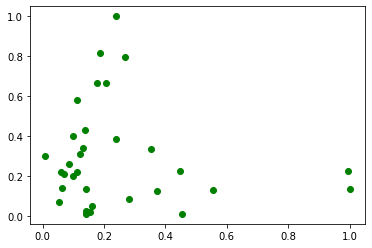

In [227]:
temp_main=main.copy()

In [241]:
col='distance_to_rrc'
desc=temp_main[col].describe().reset_index()
q1=desc.query('index=="25%"')[col].values
q3=desc.query('index=="75%"')[col].values
left_border=q1-1.5*(q3-q1)
right_border=q3+1.5*(q3-q1)
#print(desc)
#print()
#print(q1,q3,left_border,right_border)
temp_main[col+'_outlier']=(temp_main[col]<left_border[0]) | (temp_main[col]>right_border[0])


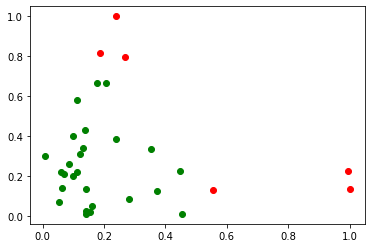

In [246]:
plt.scatter(temp_main.query('sales_area_outlier==False and distance_to_rrc_outlier==False')['sales_area'],\
            temp_main.query('sales_area_outlier==False and distance_to_rrc_outlier==False')['distance_to_rrc'],color='green')
plt.scatter(temp_main.query('sales_area_outlier==True or distance_to_rrc_outlier==True')['sales_area'],\
            temp_main.query('sales_area_outlier==True or distance_to_rrc_outlier==True')['distance_to_rrc'],color='red')

In [242]:
temp_main

,BranchCode,BranchID,BranchName,StoreID,StoreCode,StoreName,DivisionName,type,sales_area,has_parking,...,MaxCount,distance_to_rrc,CategoryCode,productcount,mix1,mix2,mix1_outlier,mix2_outlier,sales_area_outlier,distance_to_rrc_outlier
0,5917,6585,Кировский Гагарина КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.113636,1.0,...,144.0,0.580275,AM18250,218,0.065940,0.693912,False,False,False,False
1,4999,5658,Шкотово КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.160985,1.0,...,83.0,0.051188,AM18250,158,0.008241,0.212173,False,False,False,False
2,4239,4860,Находка ТК ДТС Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.994318,1.0,...,649.0,0.223441,AM18250,1713,0.222172,1.217760,False,False,True,False
3,4042,4663,Врангель ТЦ Каскад КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.084754,1.0,...,183.0,0.260113,AM18250,294,0.022046,0.344866,False,False,False,False
4,4147,4770,Чугуевка 50 Лет Октября КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.138731,0.0,...,236.0,0.431167,AM18250,381,0.059816,0.569898,False,False,False,False
5,3952,4573,Черниговка ТЦ Салют ТП,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.009470,0.0,...,124.0,0.300850,AM18250,209,0.002849,0.310319,False,False,False,False
6,3673,3951,Хороль ТЦ Елена КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.123106,0.0,...,198.0,0.309112,AM18250,394,0.038054,0.432218,False,False,False,False
7,3648,3926,Камень-Рыболов Кирова КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.100852,0.0,...,204.0,0.401845,AM18250,358,0.040527,0.502698,False,False,False,False
8,3609,3886,Уссурийск МЖК Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,1.000000,1.0,...,470.0,0.134487,AM18250,1164,0.134487,1.134487,False,False,True,False
9,3670,3945,Раздольное Лазо КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.052083,1.0,...,90.0,0.071127,AM18250,170,0.003705,0.123210,False,False,False,False


0.7241736483627854 0.5523849805246923
0.8183298889651035 -1.4550269131798879
0.6525951007224031 0.6871803804006785
0.6479425562612581 0.7317648823507132

0.7107602985778875 0.12907583252404906


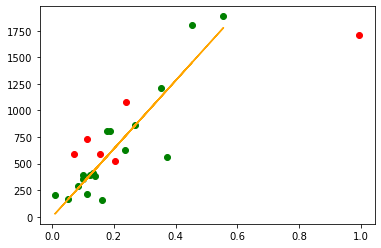

In [84]:
iters=4
temp_main=temp_main.sample(frac=1).reset_index(drop=True)
step=temp_main.shape[0]//iters
r2s=[0,0]
for i in range(iters):
    #X=main[[x for x in all_features if x not in ['competitors_in_5km',]]]
    X=temp_main[['sales_area']]
    y=temp_main.productcount

    #Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
    Xtrn, Xtest = X.drop(X.loc[i*step:(i+1)*step-1].index),X.loc[i*step:(i+1)*step-1]
    Ytrn, Ytest = y.drop(y.loc[i*step:(i+1)*step-1].index),y.loc[i*step:(i+1)*step-1]
    #print(Ytest)
    
    reg = LinearRegression().fit(Xtrn, Ytrn)
    itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
    basic=r2_score(Ytrn, reg.predict(Xtrn))
    test=r2_score(Ytest, reg.predict(Xtest))
    
    r2s[0]+=basic
    r2s[1]+=test
    if test<0:
        plt.figure()
        plt.scatter(Xtrn,Ytrn,color='green')
        plt.scatter(Xtest,Ytest,color='red')
        plt.plot(Xtrn,Xtrn*reg.coef_+reg.intercept_,color='orange')
    print(basic,test)
    #print(main.loc[i*step:(i)*step].BranchName)
    #print(Ytest)

print()
print(r2s[0]/iters,r2s[1]/iters)

In [89]:
main[['sales_area']].sort_values(by='sales_area')

,sales_area
5,0.009470
9,0.052083
19,0.058712
17,0.062973
28,0.071023
3,0.084754
13,0.099432
7,0.100852
0,0.113636
21,0.113636


In [168]:
temp_main=temp_main.sort_values('productcount',ascending=False)
deleted_dots=pd.concat([deleted_dots,temp_main.head(1)])
temp_main=temp_main.drop(temp_main.head(1).index)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


   index  sales_area
0  count   32.000000
1   mean    0.239761
2    std    0.236185
3    min    0.009470
4    25%    0.110440
5    50%    0.148674
6    75%    0.272372
7    max    1.000000

[0.11044034] [0.27237216] [-0.13245739] [0.51526988]
count    29.000000
mean      0.176659
std       0.114511
min       0.009470
25%       0.100852
50%       0.141098
75%       0.237689
max       0.454545
Name: sales_area, dtype: float64


In [60]:
good_filials.shape

(16,)

In [99]:
X=main.merge(good_filials,how='inner')[['sales_area']]
y=main.merge(good_filials,how='inner').productcount

Xtrn = X.copy()
Ytrn = y.copy()
#print(Ytest)

reg = LinearRegression().fit(Xtrn, Ytrn)
basic=r2_score(Ytrn, reg.predict(Xtrn))


print(basic)

0.5636278357341895


In [101]:
iters=5
step=main.merge(good_filials,how='inner').shape[0]//iters
r2s=[0,0]
for i in range(iters):
    #X=main[[x for x in all_features if x not in ['competitors_in_5km',]]]
    X=main.merge(good_filials,how='inner')[['sales_area']]
    y=main.merge(good_filials,how='inner').productcount

    #Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
    Xtrn, Xtest = X.drop(X.loc[i*step:(i+1)*step-1].index),X.loc[i*step:(i+1)*step-1]
    Ytrn, Ytest = y.drop(y.loc[i*step:(i+1)*step-1].index),y.loc[i*step:(i+1)*step-1]
    #print(Ytest)
    
    reg = LinearRegression().fit(Xtrn, Ytrn)
    itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
    basic=r2_score(Ytrn, reg.predict(Xtrn))
    test=r2_score(Ytest, reg.predict(Xtest))
    
    r2s[0]+=basic
    r2s[1]+=test
    #if test<0:
        #print(Ytest)
        #print(pd.DataFrame(reg.predict(Xtest)))
    print(basic,test)
    #print(main.loc[i*step:(i)*step].BranchName)
    #print(Ytest)

print()
print(r2s[0]/iters,r2s[1]/iters)

0.3950380778253505 0.8048705085052118
0.6725598781927602 -3.7822776439036616
0.5989970469827381 0.1601594858797265
0.5557723685616593 0.39873844699457883
0.5908339125847126 -1.6077609099419905

0.5626402568294442 -0.8052540224932269


In [66]:
good_filials

2     4239
4     4147
6     3673
7     3648
10    3309
11    2721
13    2270
18    1824
19    1750
22    2289
23    2290
24    2252
25    2156
26    1939
28    1977
30      10
Name: BranchCode, dtype: int64

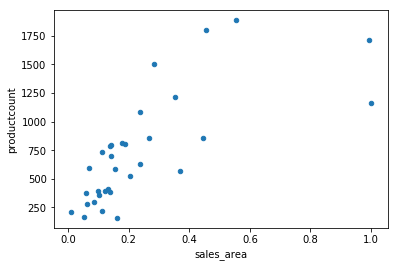

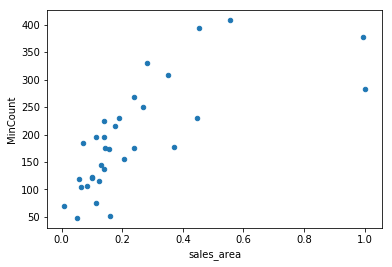

In [113]:
main.plot(x='sales_area',y='productcount',kind='scatter')
main.plot(x='sales_area',y='MinCount',kind='scatter')

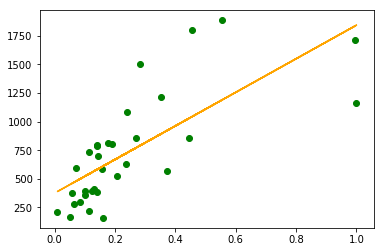

In [10]:
iters=5
step=main.shape[0]//iters
r2s=[0,0]
for i in range(iters):
    #X=main[[x for x in all_features if x not in ['competitors_in_5km',]]]
    X=main[['sales_area']]
    y=main.productcount

    #Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
    Xtrn, Xtest = X.drop(X.loc[i*step:(i+1)*step-1].index),X.loc[i*step:(i+1)*step-1]
    Ytrn, Ytest = y.drop(y.loc[i*step:(i+1)*step-1].index),y.loc[i*step:(i+1)*step-1]
    #print(Ytest)
    
    reg = LinearRegression().fit(Xtrn, Ytrn)
    itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
    basic=r2_score(Ytrn, reg.predict(Xtrn))
    test=r2_score(Ytest, reg.predict(Xtest))
    
    r2s[0]+=basic
    r2s[1]+=test
    
    print(basic,test)
    #print(main.loc[i*step:(i)*step].BranchName)
    #print(Ytest)

print()
print(r2s[0]/iters,r2s[1]/iters)

0.42388938785690533 0.6458798108793
0.617511164019376 -1.1572342384872183
0.5508501216362076 0.3001565692599254
0.5729789970343222 0.08742902087917126
0.5273524296213002 0.49947663616593274

0.5385164200336223 0.07514155973942223


In [256]:
i=11
main=main.drop(main.loc[i*step:(i+1)*step-1].index)
#X.drop(X.loc[i*step-1:(i+1)*step].index)
main=main.reset_index()
main=main.drop(columns='index')

In [112]:
X=main[all_features]
y=main.productcount

#Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
Xtrn=X
Ytrn=y

reg = LinearRegression().fit(Xtrn, Ytrn)
itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
basic=r2_score(Ytrn, reg.predict(Xtrn))
#test=r2_score(Ytest, reg.predict(Xtest))


print(basic,itogo,reg.intercept_)
main['forecast']=reg.predict(Xtrn)
main['cut']=main.productcount/main.forecast

0.7901501431345891          coeff                    colname
0  1134.507467                 sales_area
7   894.566978         competitors_in_1km
8   127.004528         competitors_in_5km
3    70.669198            distance_to_rrc
5    -1.548396  other_branches_dns_in_1km
4   -14.426799       branches_dns_in_city
6   -31.494800  other_branches_dns_in_5km
2  -134.130089                has_parking
1  -143.509679             warehouse_area 176.4628575956906


In [115]:
good_code=main.sort_values('cut')[4:-4].BranchCode

In [116]:
X=main.merge(good_code,how='inner')[all_features]
y=main.merge(good_code,how='inner').productcount

#Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
Xtrn=X
Ytrn=y

reg = LinearRegression().fit(Xtrn, Ytrn)
itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
basic=r2_score(Ytrn, reg.predict(Xtrn))
#test=r2_score(Ytest, reg.predict(Xtest))


print(basic,itogo,reg.intercept_)


0.8819317873579798          coeff                    colname
0  1180.306992                 sales_area
7  1092.797891         competitors_in_1km
6   168.760635  other_branches_dns_in_5km
3    57.123875            distance_to_rrc
5     6.990727  other_branches_dns_in_1km
1   -59.061405             warehouse_area
2   -72.166941                has_parking
4   -95.611984       branches_dns_in_city
8  -205.416725         competitors_in_5km 165.42676062000442


In [166]:
iters=5
step=main.shape[0]//iters

for f in all_features:#+add_features
    r2s=[0,0]
    for i in range(iters):
        #X=main[[x for x in all_features if x not in ['competitors_in_5km',]]]
        X=main[[f]]
        y=main.productcount
#.merge(good_code,how='inner')
        #Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)
        Xtrn, Xtest = X.drop(X.loc[i*step:(i+1)*step-1].index),X.loc[i*step:(i+1)*step-1]
        Ytrn, Ytest = y.drop(y.loc[i*step:(i+1)*step-1].index),y.loc[i*step:(i+1)*step-1]
        #print(Xtrn.shape,Ytrn.shape,Xtest.shape,Ytest.shape)
        reg = LinearRegression().fit(Xtrn, Ytrn)
        itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
        basic=r2_score(Ytrn, reg.predict(Xtrn))
        test=r2_score(Ytest, reg.predict(Xtest))

        r2s[0]+=basic
        r2s[1]+=test

        print(i,basic,test)
        #if i==1:
        #    print(pd.DataFrame(reg.predict(Xtest)))
        #    print(Ytest)
    print()
    print(f,r2s[0]/iters,r2s[1]/iters)
    print()

0 0.42388938785690533 0.6458798108793
1 0.617511164019376 -1.1572342384872183
2 0.5508501216362076 0.3001565692599254
3 0.5729789970343222 0.08742902087917126
4 0.5273524296213002 0.49947663616593274

sales_area 0.5385164200336223 0.07514155973942223

0 0.08917877895994497 0.06469309573095627
1 0.19774499776199284 -1.3359104677679978
2 0.2422003545505651 -0.283556300045851
3 0.20184938224735915 -0.20155829822954252
4 0.1767926451873889 0.0945373103762801

warehouse_area 0.1815532317414502 -0.332358931987231

0 0.004587872987792729 -0.3033516294384948
1 0.00883855879686557 -0.4929854984286848
2 0.02561904912145152 -0.39661158543350594
3 0.013612394687516072 -0.27842990895103203
4 0.004580920884136086 -0.09655430784707408

has_parking 0.011447759295552395 -0.3135865860197583

0 0.02237094532144346 -0.24416417067916485
1 0.03357044711529511 -0.37983740328511617
2 0.013563325473185728 -0.17230764992693537
3 0.023610342723111466 -0.08432600914195398
4 0.022461364305808917 -0.044184857027173

In [148]:
i=1
f='competitors_in_5km'
#print(main.loc[i*step:(i+1)*step+1][f])
print(main.loc[i*step:(i+1)*step-1]['productcount'])

6      394
7      358
8     1164
9      170
10     589
11     858
Name: productcount, dtype: int64


In [146]:
step

6

In [10]:


for f in all_features:
    X=main[[f]]
    y=main.productcount

    Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2)

    reg = LinearRegression().fit(Xtrn, Ytrn)
    itogo=pd.DataFrame({'coeff':reg.coef_,'colname':Xtrn.columns}).sort_values(by='coeff',ascending=False)
    basic=r2_score(Ytrn, reg.predict(Xtrn))
    test=r2_score(Ytest, reg.predict(Xtest))

    print(f,basic,test)

sales_area 0.49024080393774794 0.6677476373983878
warehouse_area 0.24357484969915066 -2.2916616283422075
has_parking 0.009474777936113843 -2.0891310723102947
distance_to_rrc 0.007354310558140731 -0.00940561316901456
branches_dns_in_city 0.12656510210537564 -0.21205091885012006
other_branches_dns_in_1km 0.11530509005150802 -0.08664540595493819
other_branches_dns_in_5km 0.12230307840892363 -0.18662218720054424
competitors_in_1km 0.5896268619312646 0.18421568607903094
competitors_in_5km 0.5464253929356817 -6.2602835731205015


In [132]:
main.to_csv('xx.csv',sep=';')

In [ ]:
pd.t

In [116]:
to_csv(main[all_features].corr())

In [120]:
all_features


['sales_area',
 'warehouse_area',
 'has_parking',
 'distance_to_rrc',
 'branches_dns_in_city',
 'other_branches_dns_in_1km',
 'other_branches_dns_in_5km',
 'competitors_in_1km',
 'competitors_in_5km']

In [433]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=9)
actual_features=['sales_area','has_parking','warehouse_area',\
                'branches_dns_in_city','other_branches_dns_in_1km','other_branches_dns_in_5km','competitors_in_1km','competitors_in_5km']

temp=features_orig.query('StoreID==1547')[actual_features]
for feature in actual_features:
    temp[feature]=temp[feature]/temp[feature].max()

model.fit(temp)
newx=features_orig.query('StoreID==1547')
newx['class']=model.labels_
diff=newx.groupby('class').BranchCode.count().reset_index()
print(diff)



   class  BranchCode
0      0           8
1      1          10
2      2           3
3      3           2
4      4           1
5      5           6
6      6           1
7      7           1
8      8           1


C:\Users\KHRAME~1.VV\AppData\Local\Temp/ipykernel_9328/2980222458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newx['class']=model.labels_


In [24]:
euklid_function([1,1],[2,2])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


7
56    16
49     9
55     3
31     1
14     1
8      1
2      1
Name: cluster, dtype: int64



In [30]:
main

,BranchCode,BranchID,BranchName,StoreID,StoreCode,StoreName,DivisionName,type,sales_area,has_parking,...,other_branches_dns_in_1km,other_branches_dns_in_5km,competitors_in_1km,competitors_in_5km,MinCount,MaxCount,distance_to_rrc,CategoryCode,productcount,cluster
0,5917,6585,Кировский Гагарина КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.113636,1.0,...,0.0,0.000000,0.000000,0.162791,76.0,144.0,0.580275,AM18250,218,56
1,4999,5658,Шкотово КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.160985,1.0,...,0.0,0.000000,0.076923,0.046512,51.0,83.0,0.051188,AM18250,158,56
2,4239,4860,Находка ТК ДТС Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.994318,1.0,...,0.0,0.333333,0.692308,0.744186,378.0,649.0,0.223441,AM18250,1713,2
3,4042,4663,Врангель ТЦ Каскад КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.084754,1.0,...,0.0,0.000000,0.153846,0.093023,107.0,183.0,0.260113,AM18250,294,56
4,4147,4770,Чугуевка 50 Лет Октября КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.138731,0.0,...,0.0,0.000000,0.230769,0.139535,137.0,236.0,0.431167,AM18250,381,49
5,3952,4573,Черниговка ТЦ Салют ТП,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.009470,0.0,...,0.0,0.000000,0.153846,0.093023,70.0,124.0,0.300850,AM18250,209,49
6,3673,3951,Хороль ТЦ Елена КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.123106,0.0,...,0.0,0.000000,0.192308,0.116279,116.0,198.0,0.309112,AM18250,394,49
7,3648,3926,Камень-Рыболов Кирова КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.100852,0.0,...,0.0,0.000000,0.192308,0.139535,122.0,204.0,0.401845,AM18250,358,49
8,3609,3886,Уссурийск МЖК Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,1.000000,1.0,...,0.0,1.000000,0.192308,1.000000,283.0,470.0,0.134487,AM18250,1164,8
9,3670,3945,Раздольное Лазо КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.052083,1.0,...,0.0,0.000000,0.000000,0.000000,48.0,90.0,0.071127,AM18250,170,56


,cluster,cluster_members
0,56,16
1,49,9
2,55,3


,BranchCode,BranchID,BranchName,StoreID,StoreCode,StoreName,DivisionName,type,sales_area,has_parking,...,other_branches_dns_in_5km,competitors_in_1km,competitors_in_5km,MinCount,MaxCount,distance_to_rrc,CategoryCode,productcount,cluster,cluster_members
0,5917,6585,Кировский Гагарина КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.113636,1.0,...,0.000000,0.000000,0.162791,76.0,144.0,0.580275,AM18250,218,56,16
1,4999,5658,Шкотово КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.160985,1.0,...,0.000000,0.076923,0.046512,51.0,83.0,0.051188,AM18250,158,56,16
2,4042,4663,Врангель ТЦ Каскад КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.084754,1.0,...,0.000000,0.153846,0.093023,107.0,183.0,0.260113,AM18250,294,56,16
3,3670,3945,Раздольное Лазо КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.052083,1.0,...,0.000000,0.000000,0.000000,48.0,90.0,0.071127,AM18250,170,56,16
4,2721,2814,Находка ТЦ Мега Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.446023,1.0,...,0.000000,0.384615,0.581395,230.0,401.0,0.228211,AM18250,858,56,16
5,2270,1990,Покровка ТЦ Ковчег КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.099432,1.0,...,0.000000,0.461538,0.279070,120.0,203.0,0.199411,AM18250,392,56,16
6,2283,1645,Спасск-Дальний ТЦ Спектр КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.238636,1.0,...,0.000000,0.461538,0.325581,268.0,450.0,0.387641,AM18250,1083,56,16
7,2782,2876,Арсеньев ТЦ Радуга Гипер,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.352273,1.0,...,0.000000,0.692308,0.418605,309.0,501.0,0.333611,AM18250,1214,56,16
8,1824,362,Лесозаводск ТЦ Надежда КБТ,1547,5,Прим Аэртон,01. див. Дальний Восток,Магазин,0.177557,1.0,...,0.000000,0.307692,0.279070,215.0,362.0,0.665085,AM18250,811,56,16
9,1750,552,Находка Сидоренко ТП,1547,5,Прим Аэртон,01. див. Дальний Восток,Дисконт центр,0.058712,1.0,...,0.333333,0.000000,0.651163,119.0,218.0,0.219402,AM18250,379,56,16


<AxesSubplot:xlabel='clusters'>

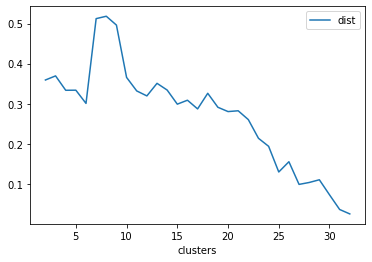

In [671]:
#svod_silh=svod_silh.set_index('clusters')
svod_silh.plot()

In [132]:
svod

NameError: name 'svod' is not defined

In [624]:
temp.iloc[:,8]

0     59
1     59
2     62
3     59
4     59
5     59
6     59
7     59
8     62
9     59
10    59
11    59
12    59
13    60
14    59
15    59
16    59
17    59
18    59
19    62
20    62
21    59
22    59
23    59
24    59
25    59
26    59
27    59
28    59
29    59
30    62
31    62
32    60
Name: cluster, dtype: int64

In [534]:
silhouette_score

,sales_area,has_parking,warehouse_area,branches_dns_in_city,other_branches_dns_in_1km,other_branches_dns_in_5km,competitors_in_1km,competitors_in_5km,cluster
0,0.113636,1.0,0.053977,0.052632,0.0,0.000000,0.000000,0.162791,34
1,0.160985,1.0,0.045455,0.052632,0.0,0.000000,0.076923,0.046512,34
2,0.994318,1.0,0.578598,0.210526,0.0,0.333333,0.692308,0.744186,2
3,0.138731,0.0,0.045455,0.052632,0.0,0.000000,0.230769,0.139535,3
4,0.084754,1.0,0.112689,0.210526,0.0,0.000000,0.153846,0.093023,4
5,0.009470,0.0,0.075758,0.052632,0.0,0.000000,0.153846,0.093023,5
6,0.123106,0.0,0.016098,0.052632,0.0,0.000000,0.192308,0.116279,33
7,0.100852,0.0,0.035985,0.052632,0.0,0.000000,0.192308,0.139535,33
8,1.000000,1.0,1.000000,0.210526,0.0,1.000000,0.192308,1.000000,8
9,0.052083,1.0,0.037879,0.052632,0.0,0.000000,0.000000,0.000000,9


In [415]:
centers=pd.DataFrame(model.cluster_centers_)
#print(centers)

from math import dist
for i in range(centers.shape[0]-1):
    for j in range(i+1,centers.shape[0]):
        #print(i,j)
        #rint(centers[i])
        #print(centers[j])
        print(dist(centers.iloc[i],centers.iloc[j]))

0.9489324748935583
1.3703259772076797
1.928144429316403
1.6566954374211071
1.7844743297271377
1.899080499681222
1.5850171544436773
2.216077322616686
1.0054036002355355
1.7436699924800465
1.366467999014244
1.5391658526056533
1.6531288137467175
1.3862811758261149
2.0765249900885023
1.360271606947187
1.6483579346736916
1.073482778173255
1.2686013516262
0.9300920377144665
1.7545520294607053
1.5990745391937382
1.0648532081955855
1.2594581087260681
0.9318720587986801
1.282936157948564
1.561317943659409
1.0489627443662948
1.7314840595962309
2.07610580509277
1.3294056611796192
1.3010363370919866
1.1784119442994454
1.3363067294556619
1.9236057084938467
1.435480217306433


In [404]:
centers.shape[0]

9

In [412]:
centers.iloc[4]

0    0.253314
1    1.000000
2    0.063447
3    0.210526
4    0.000000
5    1.000000
6    0.576923
7    0.976744
Name: 4, dtype: float64

In [339]:
features_orig.sales_area=features_orig.sales_area.fillna(0)

In [338]:
to_csv(features_orig[actual_feature])

In [246]:
from sklearn.cluster import KMeans

# Описываем модель
#model = KMeans(n_clusters=4)

features=pd.DataFrame(all_features,columns=['feature'])
features['std']=0

for feature in features.feature.to_list():
    # Проводим моделирование
    print(feature)
    n_clusters=3
    not_outlier_clusters=0
    total_clusters=1000
    while not_outlier_clusters<3 and total_clusters>=3:
        model = KMeans(n_clusters=n_clusters)
        model.fit(main[[feature]])
        newx=main.copy()
        newx['class']=model.labels_
        newx['sales']=main.productcount
        diff=newx.groupby('class').agg({'sales':['mean','count']}).reset_index()
        diff.columns=['class','mean_sales','cnt']
        
        not_outlier_clusters=diff.query('cnt>2').shape[0]
        total_clusters=diff.shape[0]
        n_clusters+=1
        
    print(diff)
    print('Средне квадратичное отклонение -',diff.query('cnt>2').mean_sales.std())
    features.loc[features.feature==feature,'std']=diff.query('cnt>2').mean_sales.std()
features
#sns.scatterplot(x='sales_area', y='productcount', data=newx, hue='class', ec=None)

sales_area
   class   mean_sales  cnt
0      0  2349.578947   19
1      1  6907.000000    2
2      2  8304.250000    4
3      3  4342.000000    7
Средне квадратичное отклонение - 3031.1514329958836
warehouse_area
   class   mean_sales  cnt
0      0  7492.000000    3
1      1  2982.590909   22
2      2  6048.000000    1
3      3  4654.333333    6
Средне квадратичное отклонение - 2279.687302873525
has_parking
   class   mean_sales  cnt
0      0  3426.200000   10
1      1  3991.136364   22
Средне квадратичное отклонение - 399.4703336661421
distance_to_rrc
   class    mean_sales  cnt
0      0   3516.600000    5
1      1   3065.928571   14
2      2  10956.000000    1
3      3   4217.083333   12
Средне квадратичное отклонение - 580.0774262493467


C:\Users\KHRAME~1.VV\AppData\Local\Temp/ipykernel_9328/298204207.py:17: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  model.fit(main[[feature]])


,feature,std
0,sales_area,3031.151433
1,warehouse_area,2279.687303
2,has_parking,399.470334
3,distance_to_rrc,580.077426


In [247]:
features=features.query(f'feature!="sales_area"')
actual_features=['sales_area',]

In [248]:
features['std']=0

for feature in features.feature.to_list():
    # Проводим моделирование
    temp_features=actual_features+[feature]
    print(temp_features)
    n_clusters=3
    not_outlier_clusters=0
    total_clusters=1000
    while not_outlier_clusters<3 and total_clusters>=3:
        model = KMeans(n_clusters=n_clusters)
        model.fit(main[temp_features])
        newx=main.copy()
        newx['class']=model.labels_
        newx['sales']=main.productcount
        diff=newx.groupby('class').agg({'sales':['mean','count']}).reset_index()
        diff.columns=['class','mean_sales','cnt']
        
        not_outlier_clusters=diff.query('cnt>2').shape[0]
        total_clusters=diff.shape[0]
        n_clusters+=1
        
    print(diff)
    print('Средне квадратичное отклонение -',diff.query('cnt>2').mean_sales.std())
    features.loc[features.feature==feature,'std']=diff.query('cnt>2').mean_sales.std()
features

['sales_area', 'warehouse_area']
   class  mean_sales  cnt
0      0     2332.25   20
1      1     9361.00    2
2      2     6289.50    6
3      3     6048.00    1
4      4     4305.00    3
Средне квадратичное отклонение - 1978.6279073725138
['sales_area', 'has_parking']
   class   mean_sales  cnt
0      0  8444.000000    4
1      1  3001.611111   18
2      2  3426.200000   10
Средне квадратичное отклонение - 3027.0499770807974
['sales_area', 'distance_to_rrc']
   class    mean_sales  cnt
0      0   2167.764706   17
1      1   6907.000000    2
2      2  10956.000000    1
3      3   6141.800000    5
4      4   4248.000000    7
Средне квадратичное отклонение - 1987.7463720582944


C:\Users\KHRAME~1.VV\AppData\Local\Temp/ipykernel_9328/1940092981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['std']=0
C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,feature,std
1,warehouse_area,1978.627907
2,has_parking,3027.049977
3,distance_to_rrc,1987.746372


In [249]:
features=features.query(f'feature!="has_parking"')
actual_features=['sales_area','has_parking']

In [261]:
features['std']=0

for feature in features.feature.to_list():
    # Проводим моделирование
    temp_features=actual_features+[feature]
    print(temp_features)
    n_clusters=3
    not_outlier_clusters=0
    total_clusters=1000
    while not_outlier_clusters<3 and total_clusters>=3:
        print(n_clusters)
        model = KMeans(n_clusters=n_clusters)
        model.fit(main[temp_features])
        newx=main.copy()
        newx['class']=model.labels_
        newx['sales']=main.productcount
        diff=newx.groupby('class').agg({'sales':['mean','count']}).reset_index()
        diff.columns=['class','mean_sales','cnt']
        
        not_outlier_clusters=diff.query('cnt>2').shape[0]
        total_clusters=diff.shape[0]
        n_clusters+=1
        
    print(diff)
    print('Средне квадратичное отклонение -',diff.query('cnt>2').mean_sales.std())
    features.loc[features.feature==feature,'std']=diff.query('cnt>2').mean_sales.std()
features

['sales_area', 'has_parking', 'warehouse_area']
3
   class   mean_sales  cnt
0      0  3317.631579   19
1      1  3426.200000   10
2      2  8256.666667    3
Средне квадратичное отклонение - 2820.7346240991315
['sales_area', 'has_parking', 'distance_to_rrc']
3
   class   mean_sales  cnt
0      0  3317.631579   19
1      1  3426.200000   10
2      2  8256.666667    3
Средне квадратичное отклонение - 2820.7346240991315


C:\Users\KHRAME~1.VV\AppData\Local\Temp/ipykernel_9328/3245866118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['std']=0
C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Khramenkov.VV\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,feature,std
1,warehouse_area,2820.734624
3,distance_to_rrc,2820.734624


In [262]:
model

KMeans(n_clusters=3)

In [167]:
newx['sales']=main.productcount
print(newx.groupby('class').sales.mean())
newx.sort_values(['class','sales'])

class
0    2684.760000
1    6907.000000
2    6944.166667
Name: sales, dtype: float64


,sales_area,class,sales
1840,0.113636,0,531
88,0.160985,0,798
1286,0.009470,0,892
2235,0.052083,0,898
2272,0.084754,0,1311
2527,0.062973,0,1556
1168,0.100852,0,1629
173,0.123106,0,1701
1955,0.131629,0,1849
1793,0.099432,0,1857


In [173]:
newx['sales']=main.productcount
diff=newx.groupby('class').sales.mean().reset_index()
newx.sort_values(['class','sales'])

,sales_area,has_parking,class,sales
1286,0.009470,0,0,892
1168,0.100852,0,0,1629
173,0.123106,0,0,1701
619,0.138731,0,0,2228
978,0.155303,0,0,2658
2253,0.071023,0,0,2874
569,0.371212,0,0,2955
1340,0.141098,0,0,3516
1980,0.282670,0,0,7028
1179,0.454545,0,0,8781


In [175]:
diff.sales.std()

3069.6850473578393

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv("http://qps.ru/jNZUT")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [73]:
newx=x.copy()
newx['class']=model.labels_
newx['has_parking']=newx['has_parking']*1

In [74]:
to_csv(newx)

<AxesSubplot:xlabel='sales_area', ylabel='has_parking'>

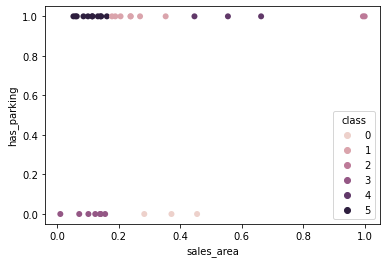

In [75]:
import seaborn as sns
sns.scatterplot(x='sales_area', y='has_parking', data=newx, hue='class', ec=None)

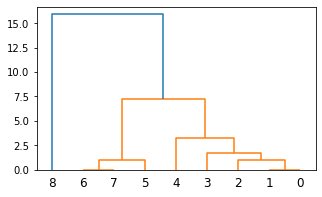

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
#X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X = [[i] for i in [0, 0, 1,2, 4, 8, 9, 9,20]]
# X = [[1,2],[3,2],[4,4],[1,2],[1,3]]
Z = linkage(X, 'average',optimal_ordering=True)
f = fcluster(Z,4,'distance')
fig = plt.figure(figsize=(5, 3))
dn = dendrogram(Z)
plt.show()

In [145]:
f

array([2, 2, 2, 2, 2, 1, 1, 1, 3], dtype=int32)

In [148]:
Z

array([[ 1.        ,  0.        ,  0.        ,  2.        ],
       [ 6.        ,  7.        ,  0.        ,  2.        ],
       [ 2.        ,  9.        ,  1.        ,  3.        ],
       [10.        ,  5.        ,  1.        ,  3.        ],
       [ 3.        , 11.        ,  1.66666667,  4.        ],
       [ 4.        , 13.        ,  3.25      ,  5.        ],
       [12.        , 14.        ,  7.26666667,  8.        ],
       [ 8.        , 15.        , 15.875     ,  9.        ]])

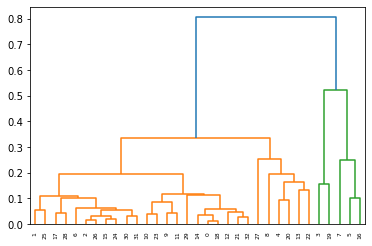

In [149]:

# Извлекаем измерения как массив NumPy
samples = x.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='average')
f = fcluster(mergings,2,'distance')
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [ ]:
# с кластеризацией пока не срослось

all_features=['sales_area',]

def euklid_function(a,b):
    return sum((a-b)**2)**(0.5)

#from math import dist
from sklearn.metrics import silhouette_score

#temp=features_orig.query('StoreID==1547')[all_features]
temp=main[all_features]
for feature in all_features:
    temp[feature]=temp[feature]/temp[feature].max()
    
temp=temp.reset_index()
temp['cluster']=temp.index
temp=temp.drop(columns='index')

svod=pd.DataFrame(columns=['dist','clusters'])
svod_silh=pd.DataFrame(columns=['dist','clusters'])
for _ in range(32):
    clusters=temp.groupby('cluster').mean().reset_index()

    min_dist=10000
    old_clusters=[]
    for i in range(clusters.shape[0]-1):
        for j in range(i+1,clusters.shape[0]):
            #print(i,j)
            #rint(centers[i])
            #print(centers[j])
            euklid=euklid_function(clusters.iloc[i][1:],clusters.iloc[j][1:])
            if euklid<min_dist:
                min_dist=euklid
                old_clusters=[clusters.loc[i,'cluster'],clusters.loc[j,'cluster']]
    
    temp.loc[temp.cluster.isin(old_clusters),'cluster']=temp.cluster.max()+1
    #print(old_clusters)
    #print(temp.cluster.nunique())
    #print(temp.cluster.value_counts())
    clusters_cnt=temp.cluster.nunique()
    if clusters_cnt==7:
        break
    silh_dist=silhouette_score(temp.iloc[:,0:1],temp.iloc[:,1:2])
    svod=svod.append({'dist':min_dist,'clusters':temp.cluster.nunique()},ignore_index=True)
    svod_silh=svod_silh.append({'dist':silh_dist,'clusters':temp.cluster.nunique()},ignore_index=True)

print(temp.cluster.nunique())
print(temp.cluster.value_counts())
main['cluster']=temp['cluster']

good_clusters=main.cluster.value_counts().reset_index()
print(good_clusters)
good_clusters.columns=['cluster','cluster_members']
good_clusters=good_clusters.query('cluster_members>2')
good_filials=main.merge(good_clusters,how='inner').BranchCode